# Sea Level Predictor

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Read and Inspect Data
**Here we load the dataset and display the first few rows to understand its structure. The dataset contains sea level measurements and corresponding years.**

In [2]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv")

# Display the first few rows of the dataframe
df.head()


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


# Create Scatter Plot
**We generate a scatter plot to visualize the relationship between year and sea level**

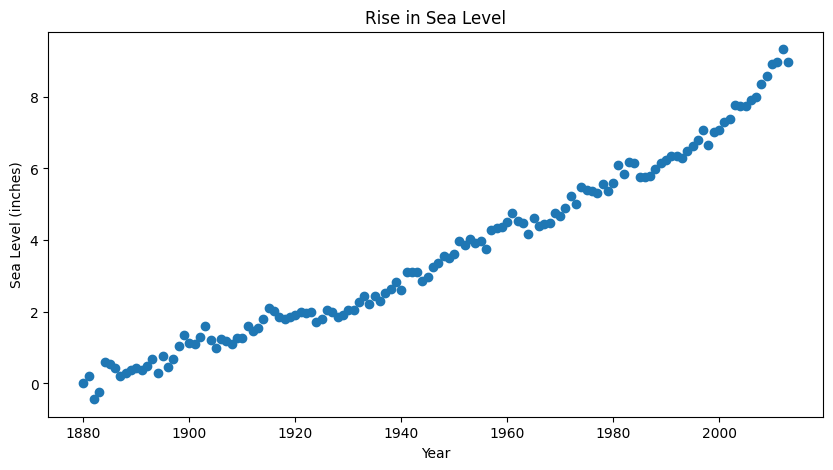

In [3]:
# Create scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.show()


# First Line of Best Fit
**This plot includes a red line representing the linear regression fit for the entire dataset, showing the general trend over the years.**

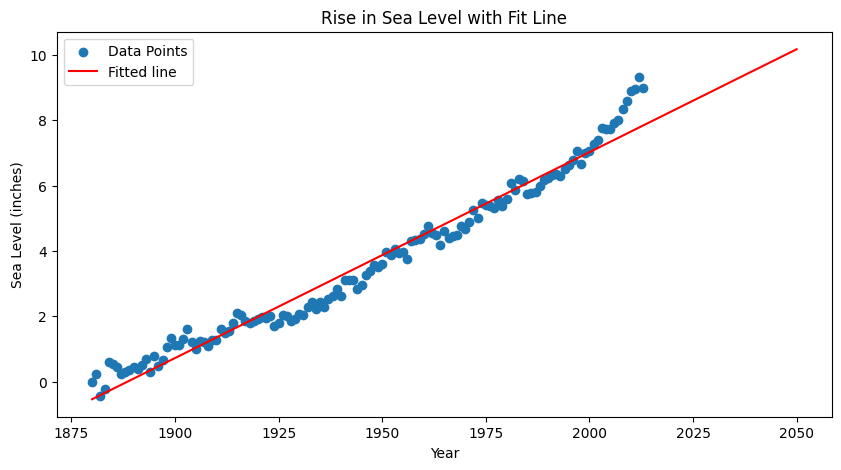

In [4]:
# Create first line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years = list(range(df['Year'].min(), 2051))
predicted_sea_levels = [slope * year + intercept for year in years]

plt.figure(figsize=(10,5))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data Points')
plt.plot(years, predicted_sea_levels, color='red', label='Fitted line')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level with Fit Line")
plt.legend()
plt.show()


# Second Line of Best Fit (From 2000 Onwards)
This plot includes a blue line representing the linear regression fit starting from the year 2000. It highlights the trend over a more recent period.

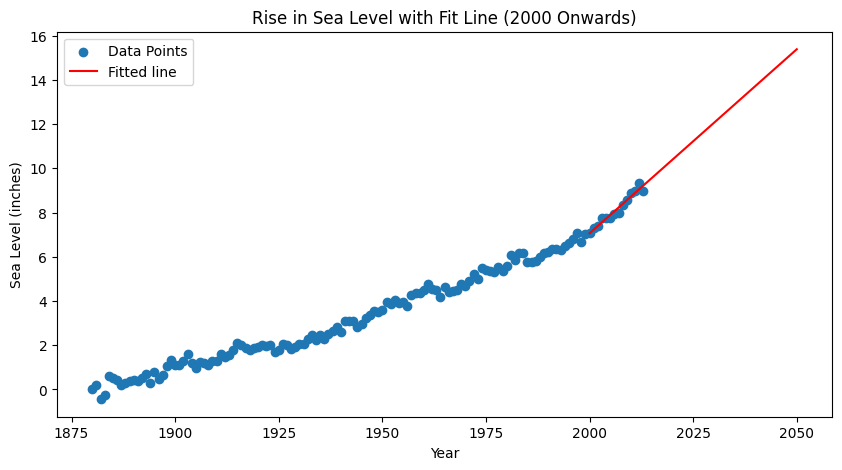

In [6]:
# Create second line of best fit
years = list(range(2000, 2051))
new_df = df[df['Year'] >= 2000]
slope, intercept, r_value, p_value, std_err = linregress(new_df['Year'], new_df['CSIRO Adjusted Sea Level'])
predicted_sea_levels = [slope * year + intercept for year in years]

plt.figure(figsize=(10,5))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data Points')
plt.plot(years, predicted_sea_levels, color='red', label='Fitted line')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level with Fit Line (2000 Onwards)")
plt.legend()
plt.show()


# Save Plot and Return Data
**The `draw_plot` function generates the scatter plot and the two lines of best fit. It saves the final plot as sea_level_plot.png and returns the plot object for further use.**

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

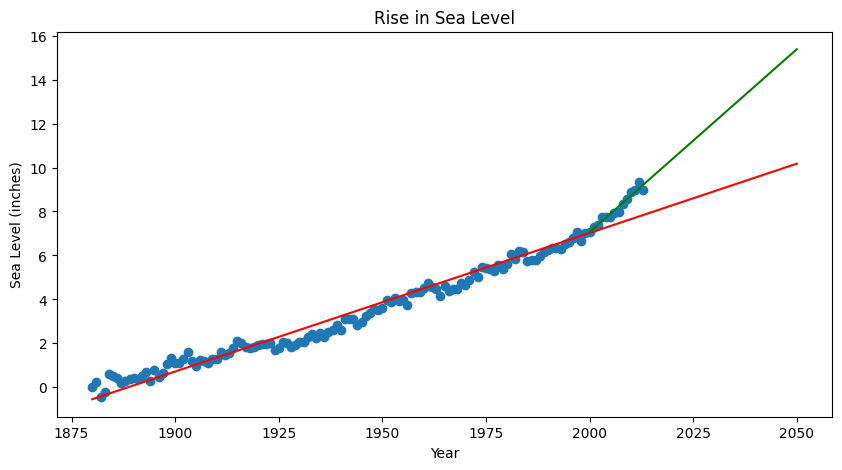

In [10]:
def draw_plot():
    # Create scatter plot
    plt.figure(figsize=(10,5))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
    
    # Create first line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    years = list(range(df['Year'].min(), 2051))
    predicted_sea_levels = [slope * year + intercept for year in years]
    plt.plot(years, predicted_sea_levels, color='red', label='Fitted line')

    # Create second line of best fit
    years = list(range(2000, 2051))
    new_df = df[df['Year'] >= 2000]
    slope, intercept, r_value, p_value, std_err = linregress(new_df['Year'], new_df['CSIRO Adjusted Sea Level'])
    predicted_sea_levels = [slope * year + intercept for year in years]
    plt.plot(years, predicted_sea_levels, color='green', label='Fitted line')

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()